> # 北京二手房价格预测

In [25]:
# import the packeg
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl

import matplotlib.pyplot as plt
from IPython.display import display
plt.style.use('fivethirtyeight')
sns.set_style({'font.sans-serif':['simhei','Arial']})
sns.set_context('talk')
%matplotlib inline

#check the python version
from sys import version_info
if version_info.major !=3:
    raise Exception('Please use Python 3 in this project')

In [35]:
#import the data
lianjia_df = pd.read_csv('lianjia.csv')
display(lianjia_df.head(n=2))

,Direction,District,Elevator,Floor,Garden,Id,Layout,Price,Region,Renovation,Size,Year
0,东西,灯市口,NaN,6,锡拉胡同21号院,101102647043,3室1厅,780.0,东城,精装,75.0,1988
1,南北,东单,无电梯,6,东华门大街,101102650978,2室1厅,705.0,东城,精装,60.0,1988


In [27]:
#check the missing data
print(lianjia_df.info(),'\n')
print(lianjia_df.describe(),'\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23677 entries, 0 to 23676
Data columns (total 12 columns):
Direction     23677 non-null object
District      23677 non-null object
Elevator      15440 non-null object
Floor         23677 non-null int64
Garden        23677 non-null object
Id            23677 non-null int64
Layout        23677 non-null object
Price         23677 non-null float64
Region        23677 non-null object
Renovation    23677 non-null object
Size          23677 non-null float64
Year          23677 non-null int64
dtypes: float64(2), int64(3), object(7)
memory usage: 2.2+ MB
None 

              Floor            Id         Price          Size          Year
count  23677.000000  2.367700e+04  23677.000000  23677.000000  23677.000000
mean      12.765088  1.011024e+11    610.668319     99.149301   2001.326519
std        7.643932  5.652477e+05    411.452107     50.988838      9.001996
min        1.000000  1.010886e+11     60.000000      2.000000   1950.000000
25%        

In [36]:
# 添加 <房价>特征值
df = lianjia_df.copy()
df = df[(df.Layout!='叠拼别墅') & (df.Size<1000)]
df['PerPrice'] = lianjia_df['Price']/lianjia_df['Size']

#重新排放位置
columns = ['Region', 'District', 'Garden', 'Layout', 'Floor', 'Year', 
           'Size', 'Elevator', 'Direction', 'Renovation', 'PerPrice', 'Price']
df = pd.DataFrame(df, columns = columns)

display(df.head(n=2))

,Region,District,Garden,Layout,Floor,Year,Size,Elevator,Direction,Renovation,PerPrice,Price
0,东城,灯市口,锡拉胡同21号院,3室1厅,6,1988,75.0,NaN,东西,精装,10.40,780.0
1,东城,东单,东华门大街,2室1厅,6,1988,60.0,无电梯,南北,精装,11.75,705.0


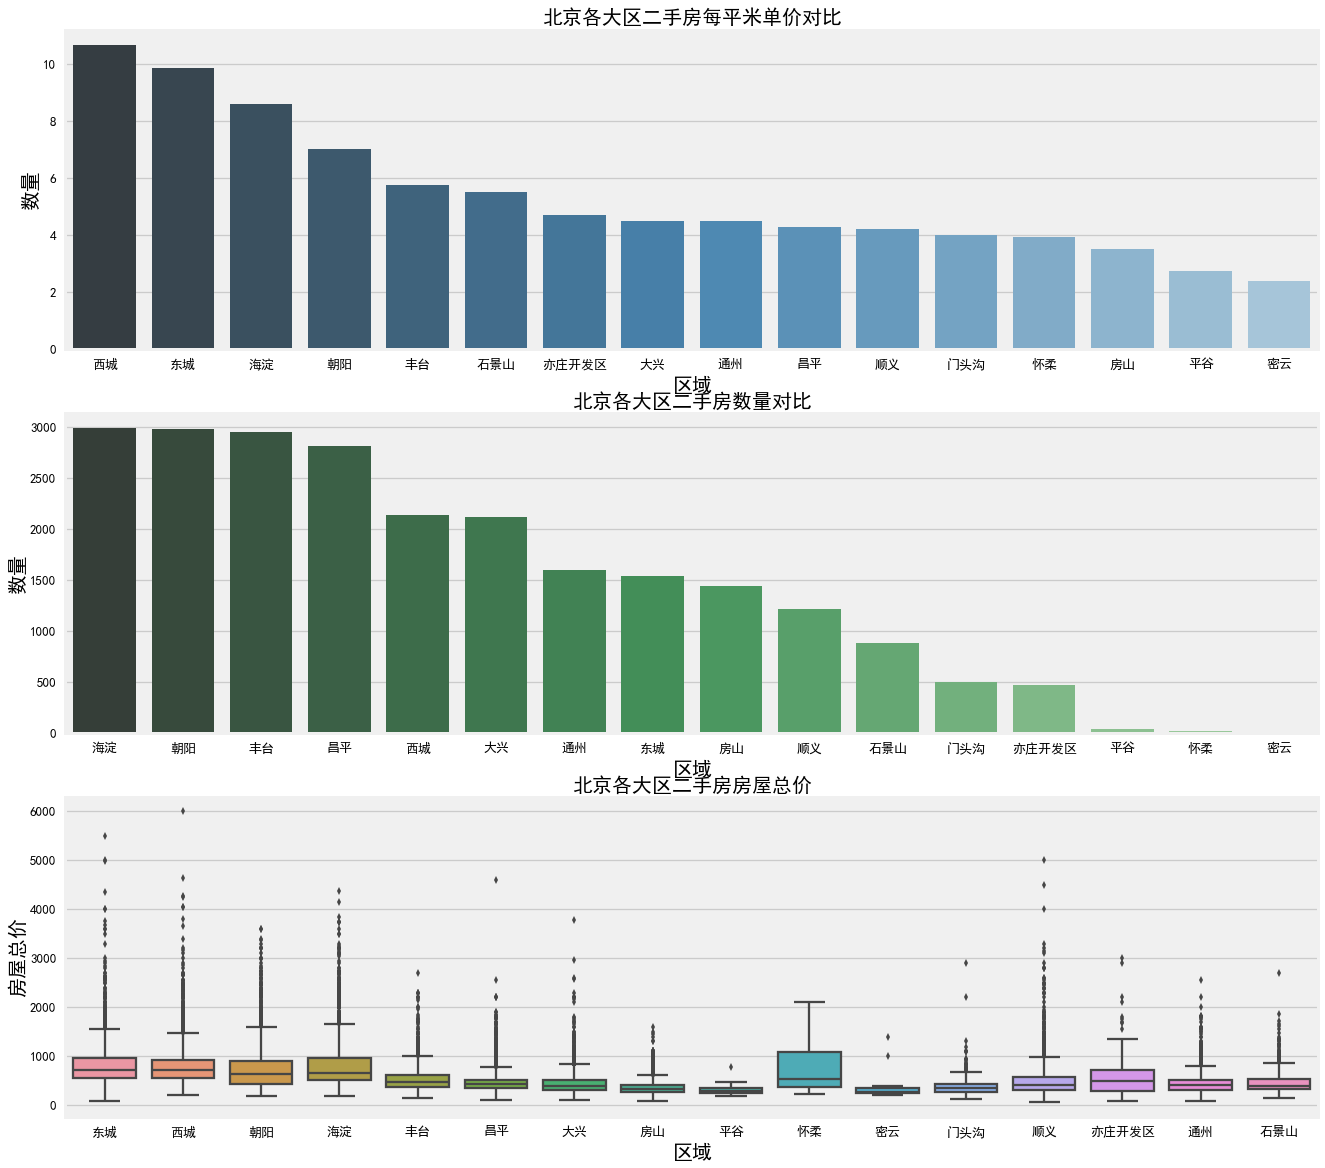

In [29]:
#观察不同区域二手房的数量和单价
##代码含义----用Region对df进行分组，取出Preice列(取出为Series)，统计个数，按照降序排列，将其转成DateFrame
###----重新进行索引
df_house_count = df.groupby('Region')['Price'].count().sort_values(ascending=False).to_frame().reset_index()
df_house_mean = df.groupby('Region')['PerPrice'].mean().sort_values(ascending=False).to_frame().reset_index()
#划分3块画布
f, [ax1, ax2, ax3] = plt.subplots(3, 1, figsize = (20,20))
sns.barplot(x='Region', y='PerPrice', palette='Blues_d', data=df_house_mean, ax= ax1)
ax1.set_title('北京各大区二手房每平米单价对比',fontsize=20)
ax1.set_xlabel('区域', fontsize=20)
ax1.set_ylabel('数量', fontsize=20)

sns.barplot(x='Region', y='Price', palette='Greens_d',data=df_house_count,ax=ax2)
ax2.set_title('北京各大区二手房数量对比', fontsize=20)
ax2.set_xlabel('区域', fontsize=20)
ax2.set_ylabel('数量', fontsize=20)

sns.boxplot(x='Region', y='Price', data=df, ax=ax3)
ax3.set_title('北京各大区二手房房屋总价', fontsize=20)
ax3.set_xlabel('区域', fontsize=20)
ax3.set_ylabel('房屋总价', fontsize=20)

plt.show()


D:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


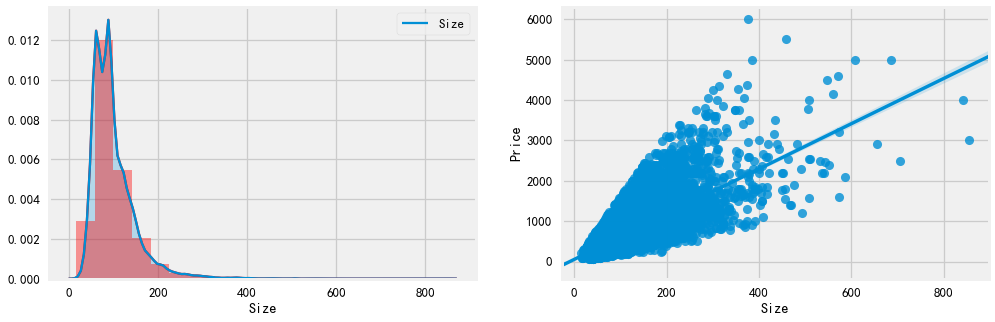

In [30]:
f, [ax1, ax2] = plt.subplots(1, 2, figsize=(15, 5))
###房屋建造时间统计
sns.distplot(df['Size'], bins=20, ax=ax1, color='r')
sns.kdeplot(df['Size'], shade=True, ax=ax1)
#建房时间与出售价格的关系
sns.regplot(x='Size', y='Price', data= df, ax=ax2)
plt.show()

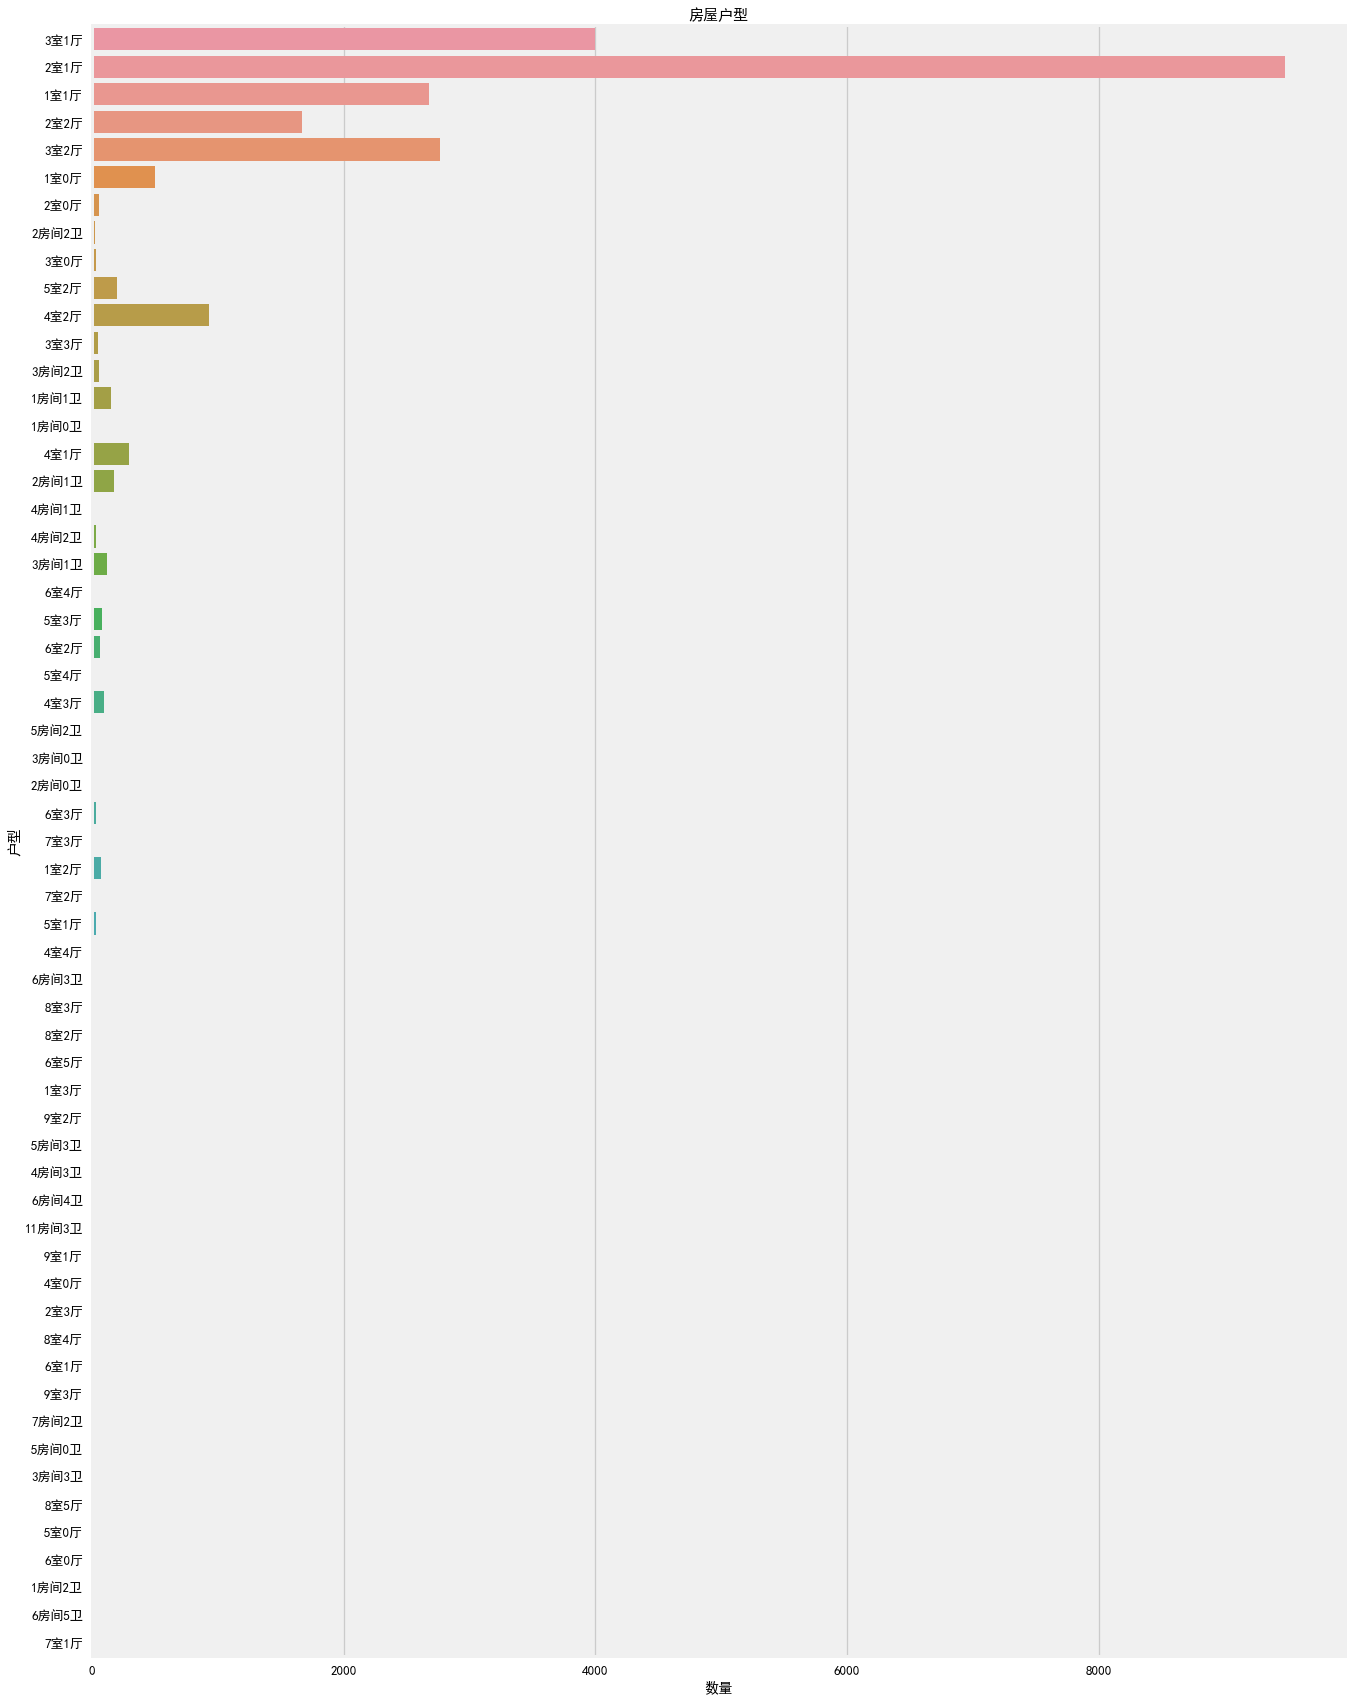

In [31]:
#Layout特征分析
f, ax1 = plt.subplots(figsize= (20,30))
sns.countplot(y='Layout', data=df, ax=ax1)
ax1.set_title('房屋户型',fontsize=15)
ax1.set_xlabel('数量')
ax1.set_ylabel('户型')
plt.show()

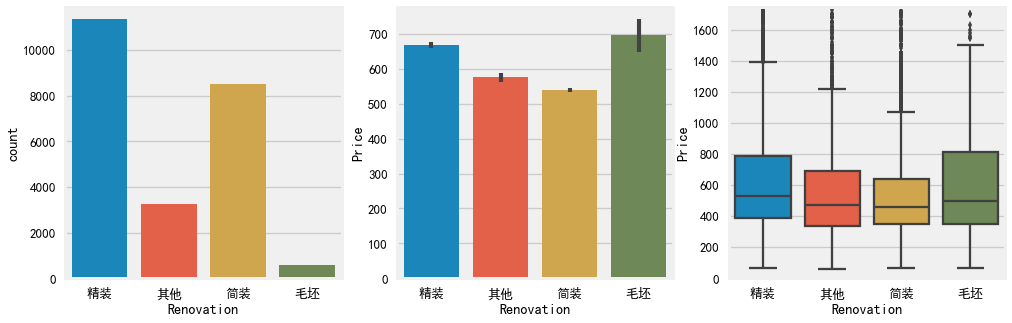

In [32]:
df['Renovation'].value_counts()
# 装修 价格 情况分析
f, ax = plt.subplots(1, 3, figsize = (15,5))
sns.countplot(df['Renovation'], ax=ax[0])
sns.barplot(x='Renovation', y='Price', data=df, ax=ax[1])
sns.boxplot(x='Renovation',y='Price', data=df, ax=ax[2])
ax[2].set_ylim(0, 1750)
plt.show()

## Elevator

In [33]:
msin = len(df.loc[(df['Elevator'].isnull()), 'Elevator'])
print('Elevator缺失的数量为:',msin)

Elevator缺失的数量为: 8237


无电梯    9632
有电梯    9341
Name: Elevator, dtype: int64
有电梯    14024
无电梯     9632
Name: Elevator, dtype: int64


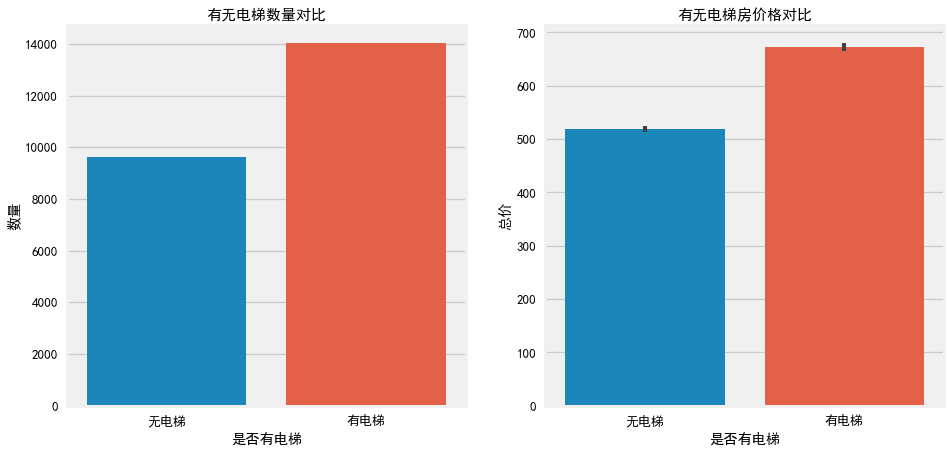

In [47]:
##电梯统计分析
print(df['Elevator'].value_counts())
# 填补Elevator缺失值
df.loc[(df['Floor'] > 6) & (df['Elevator'].isnull()), 'Elevator'] = '有电梯'
df.loc[(df['Floor'] <= 6) & (df['Elevator'].isnull()), 'Elevator'] = '无电梯'
print(df['Elevator'].value_counts())

f, ax = plt.subplots(1, 2, figsize=(14,7))
sns.countplot(df['Elevator'], ax=ax[0])
ax[0].set_title('有无电梯数量对比', fontsize=15)
ax[0].set_xlabel('是否有电梯')
ax[0].set_ylabel('数量')

sns.barplot(x='Elevator', y='Price', data=df, ax=ax[1])
ax[1].set_title('有无电梯房价格对比', fontsize=15)
ax[1].set_xlabel('是否有电梯')
ax[1].set_ylabel('总价')
plt.show()


## Year分析

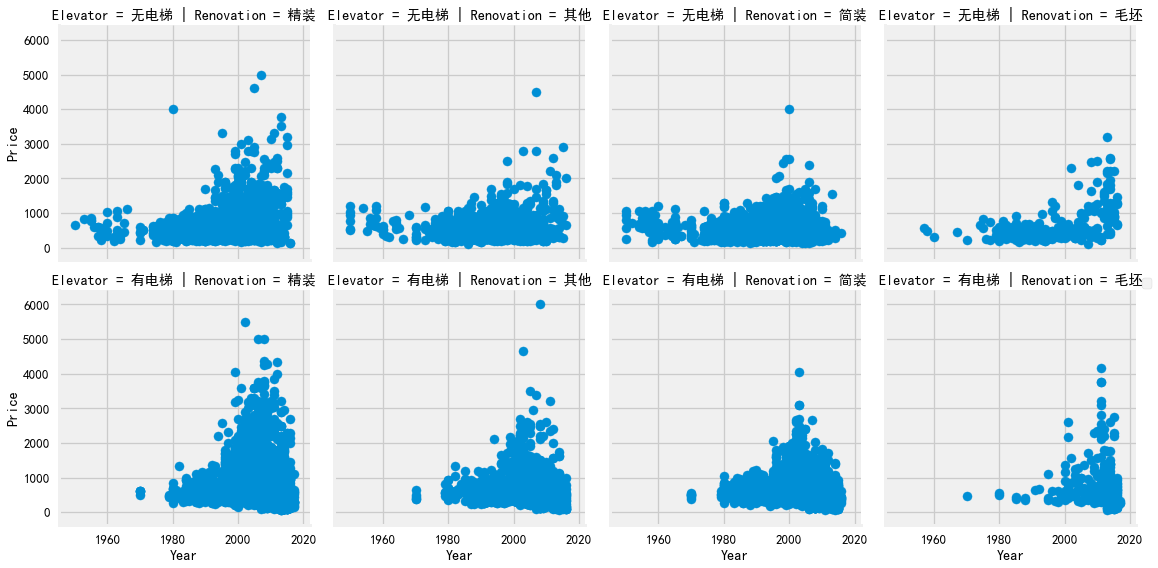

In [49]:
grid = sns.FacetGrid(df, row='Elevator', col='Renovation', palette='seismic', size=4)
grid.map(plt.scatter, 'Year', 'Price')
grid.add_legend()